### Analyzing the Time Series pattern in Subway ridership data

For this analysis, we use the datewise cumulative number of passengers entring into MTAsubway systems.
The data was obtained from http://web.mta.info/developers/turnstile.html
For ease of convenience, the original turnstile data was preprocessed and stored in a remote location at github
such that the final useful data can be accessed without downloading it from the developer website everytime. 

In [1]:
# Import useful packages

from __future__  import print_function, division # for setting up compatibility between python2.0 and python3.0
import pandas as pd # for handling data frames
import numpy as np # for handling numbers and arrays
import matplotlib.pylab as plt # for drwaing plots
import os # for running terminal commands
import urllib
from datetime import datetime
from pandas.plotting import autocorrelation_plot
import matplotlib.gridspec as gridspec
%matplotlib inline


In [2]:
# Check if PUIDATA is present or not and if not set it up
if os.getenv("PUIDATA")==None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
    print("Earlier missing now, updated:  PUIdata:", os.getenv("PUIDATA"))
else:
    print("Already present: PUIdata", os.getenv("PUIDATA"))

Earlier missing now, updated:  PUIdata: /nfshome/skp454/PUIdata


In [9]:
# Download csv from github account
os.system("curl -O https://raw.githubusercontent.com/Shivam0712/PUI2018_skp454/master/HW8_skp454/DaywiseEntries.csv")
os.system("mv DaywiseEntries.csv " + os.getenv("PUIDATA"))

0

In [12]:
# Import and treat data for datewise number of passenger entring into subway system 
df_daywise = pd.read_csv(os.getenv("PUIDATA") + "/DaywiseEntries.csv", usecols=['DATE','ENTRIES'])
df_daywise['DATE']=df_daywise['DATE'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))
df_daywise = df_daywise.sort_values(['DATE'])
df_daywise = df_daywise.reset_index(drop= True)

In [13]:
# Calculate the yearly trend for each date by calculating the moving average of last 365 days
for i in range(364,len(df_daywise)):
    df_daywise.loc[i,'YEARLY_TREND']= np.sum(df_daywise.ENTRIES[i-364:i])/364

In [14]:
# Calculate the residual after deducting trend from number of entries
df_daywiseTr=df_daywise.loc[364:797,:].reset_index(drop=True)
df_daywiseTr['TREND_RESIDUAL']=df_daywiseTr['ENTRIES']-df_daywiseTr['YEARLY_TREND']

In [15]:
# Calculate the moving weekly average trend  
for i in range(36,len(df_daywiseTr)):
    df_daywiseTr.loc[i,'WEEKS_TREND']= np.sum(df_daywiseTr.TREND_RESIDUAL[i-7:i])/7

In [16]:
# Calculate the residual after deducting weekly moving average from residual left after deducting trend
df_daywiseTrSea=df_daywiseTr.loc[36:,:].reset_index(drop=True)
df_daywiseTrSea['WEEKS_TREND_RESIDUAL']=df_daywiseTrSea['TREND_RESIDUAL']-df_daywiseTrSea['WEEKS_TREND']
df_daywiseTrSea['MODELLED_DATA'] = df_daywiseTrSea['YEARLY_TREND']+df_daywiseTrSea['WEEKS_TREND']
df_daywiseDup=df_daywiseTrSea.copy(deep =True)
df_daywiseDup.index = df_daywiseDup['DATE']

In [19]:
df_daywiseDup.columns

Index(['DATE', 'ENTRIES', 'YEARLY_TREND', 'TREND_RESIDUAL', 'WEEKS_TREND',
       'WEEKS_TREND_RESIDUAL', 'MODELLED_DATA'],
      dtype='object')

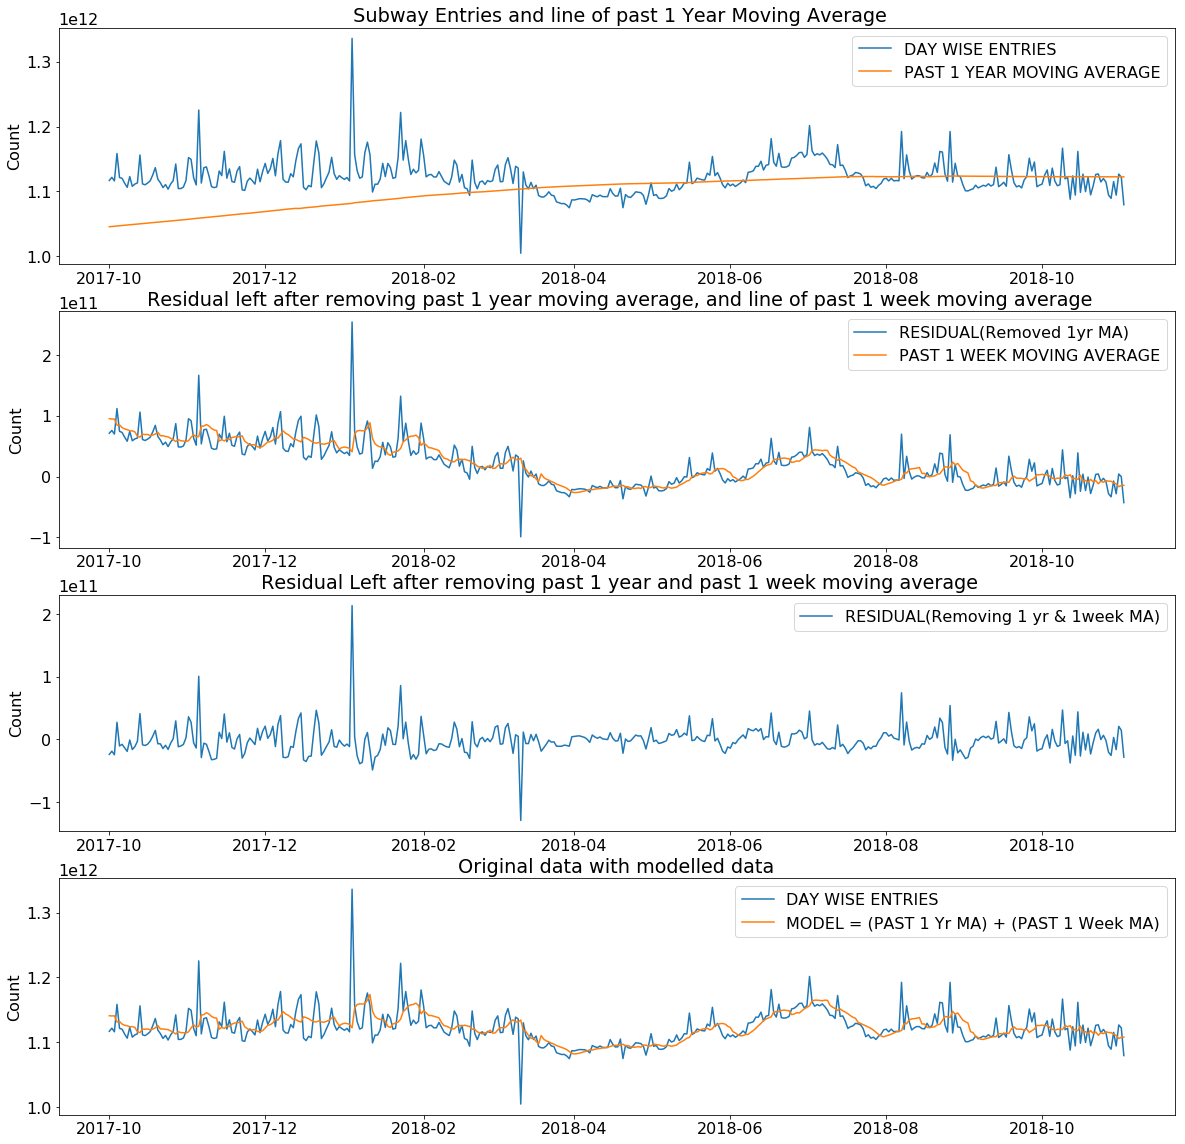

In [27]:
# Plot the data
plt.rcParams['font.size'] = 16
plt.figure(figsize=(20, 20))

#plt.subplot(423)
plt.subplot(411)
plt.plot(df_daywiseDup['ENTRIES'], '-', label = 'DAY WISE ENTRIES')
ax = plt.plot(df_daywiseDup['YEARLY_TREND'], '-', label ='PAST 1 YEAR MOVING AVERAGE')
plt.ylabel("Count")
plt.title(" Subway Entries and line of past 1 Year Moving Average")
plt.legend()
#plt.show()

plt.subplot(412)
plt.plot(df_daywiseDup['TREND_RESIDUAL'], '-',label= 'RESIDUAL(Removed 1yr MA)')
ax = plt.plot(df_daywiseDup['WEEKS_TREND'], '-', label= 'PAST 1 WEEK MOVING AVERAGE')
plt.ylabel("Count")
plt.title(" Residual left after removing past 1 year moving average, and line of past 1 week moving average")
plt.legend()
#plt.show()


plt.subplot(413)
plt.plot(df_daywiseDup['WEEKS_TREND_RESIDUAL'], '-', label = 'RESIDUAL(Removing 1 yr & 1week MA)')
#ax = plt.plot(df_daywiseDup['4_WEEKS_TREND'], '-')
plt.ylabel("Count")
plt.title(" Residual Left after removing past 1 year and past 1 week moving average")
plt.legend()
#plt.show()

plt.subplot(414)
plt.plot(df_daywiseDup['ENTRIES'], '-', label = 'DAY WISE ENTRIES')
ax = plt.plot(df_daywiseDup['MODELLED_DATA'], '-', label = 'MODEL = (PAST 1 Yr MA) + (PAST 1 Week MA)')
plt.ylabel("Count")
plt.title("Original data with modelled data")
plt.legend()

plt.savefig('MTA Entries.png')

### Fig1: Time series data of passengers' entries into MTA Subway
1. The figure shows an attempt to model daywise MTA Subway entries as sum of past 1 Year and past 7 day moving average.  
2. In the top left figure we see the original data of number of entries over time with past 1 year moving average.
3. In top right figure we remove the past 1 year moving average. Past 1 week moving average is calculated on the residual.
4. After removing the past 1 year and 1 week moving average, in bottom left we see the final residual left.
5. In bottom right figure we superimpose our modelled data which is obtained by adding past 1 year and 1 week moving average, we see the model data is able to explain much of the variation present in the actual data.


## skp454_PlotReview_nl949:

Overall, the charts look great! Good job with the modelled data, looks like it tracks with the actual very closely. 

**CLARITY**
Some ideas for clarity as follows:
1. I'm not totally sure what removing the yearly and weekly trend is doing for each set of data. It might be worth clarifying this below.

<span style="color:red">Suggestion Accomodated: Added objective statement in the caption</span>

2. I think some of the titles could be reworded to make more explicit what each graph represents.

3. Same as above for labeling the lines. 

<span style="color:red">Suggestion Accomodated: Renamed title and labels</span>

**ESTHETIC**
1. The lines might benefit from being different line weights or colors, it's a bit hard to distinguish between the orange and blue when they are closely overlapping.

<span style="color:red">Suggestion Accomodated with Alternates: I don't agree with differentiating the weights of lines here. I consider weights of line should be used for representing a separate dimension of data rather than for aesthetic purposes. But, I acknowledge that in parts it wmay be difficult to distinguish between these lines. Thus, I have expanded the width of the graph.</span>

2. I think, in terms of economy of space, you could remove the years from the month labels and just clarify that the data is for 2017-18 in the title of the chart. 

<span style="color:red"> Suggestion Rejected: I am not aligned with this. Months are important to show, otherwise it will be difficult to read the plots</span>

**HONESTY**
1. For chart 1, the "YEARLY_TREND" line doesn't seem to actually be showing a yearly trend, otherwise wouldn't it only have two differently sloped segments?

<span style="color:red">Comment: The line mentioned as Yearly trend is past 1 years moving average thus, it has different slopes.</span>

## Plot Review by Shijia Gu:

##### Review:
- Clarity: The plots are very easy to read. Each plot has titles, x & y labels, legends. Also, the captions below guide me perfectly.
- Esthetic: The plots are truly functional. The colors are chosen appropriately. The graphical elements are used appropriate to represent the quantities being visualized. The graphical choices are allowing me to focus on the right elements. 
- Honesty: The plots are honestly reproducing the data.
- Suggestions: : I think the author really did great jobs not only on plotting but also analyzing. The only suggestion I can come up with is to make the plots and font sizes larger.

<span style="color:red">Suggestion Accomodated. Increased the fontsize of Title and Labels</span>


## Plot Review by TA- Ilyas Habeeb:

1. One suggestion is to enlargen the plots so that it becomes easier to observe what is going on in the graph.

<span style="color:red">Suggestion Accomodated. Increased width to increase visibility.</span>

2. You could also try using tools like plotly that makes your graph customizable and also gives you the ability to zoom within graphs.

<span style="color:red">Suggestion Noted. Will try to replicate the same work in plotly with additional features.</span>

3. Also, it seems like you did not remove the seasonalities to make the time series completely stationary. All in all, job well done!

<span style="color:red">Comment: I only had data for 2 years. According to me, as any month or season will have atmost 2 datapoints, calculating season was not possible.</span>